<a href="https://colab.research.google.com/github/sekhar0146/Machine-learning-projects/blob/master/bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# Import numpy
import numpy as np
# Import pandas
import pandas as pd
# Import Ridge from sklearn's GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Import Ridge from sklearn's RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge
# Import SVR from sklearn's svm module
from sklearn.svm import SVR
# Import XGBoost regressor
from xgboost import XGBRegressor
# Import lasso regressior
from sklearn.linear_model import Lasso

In [114]:
# import the data
df = pd.read_csv("drive/My Drive/bike-sharing-demand/train.csv",
                 low_memory=False,
                 parse_dates=["datetime"]) # convert into yyyy-mm-dd

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Check for null
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# check for non_numeric data if available 
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

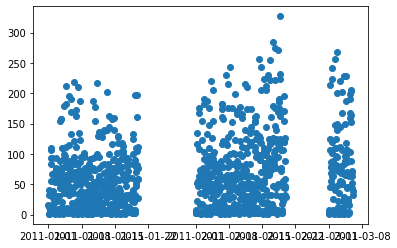

In [115]:
import matplotlib.pyplot as plt
# plot the data between datetime and count
fig1, ax1 = plt.subplots()
ax1.scatter(df["datetime"][:1000], df["count"][:1000]);

In [116]:
# Sort the DataFrame by datetime
# when working with time series, it is good to sort it by date
df.sort_values(by=["datetime"], 
               inplace=True,
               ascending=True)
print(df.datetime[:5])


0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]


In [117]:
# Make a copy of original dataframe - for future reference
df_tmp = df.copy()

In [119]:
# datetime is non-numeric so, we need to turn that into numeric
# We can convert that into day, month, year , etc...
# import the data again with parse dates
df_tmp["year"] = df_tmp.datetime.dt.year
df_tmp["month"] = df_tmp.datetime.dt.month
df_tmp["day"] = df_tmp.datetime.dt.day
df_tmp["hour"] = df_tmp.datetime.dt.hour
df_tmp.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [120]:
# Now we have enrichied our dataframe with year, month and day features,
# we can remove datetime
df_tmp.drop("datetime", axis=1, inplace=True)
df_tmp.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [121]:
# I feel casual and registered coloumns are not needed for our predictions as both results count column 
df_tmp.drop(["casual","registered"], axis=1, inplace=True)
df_tmp.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [128]:
# split dataset
from sklearn.model_selection import train_test_split

X = df_tmp.drop("count", axis=1)
y = df_tmp["count"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 12), (2178, 12), (8708,), (2178,))

In [129]:
# ===========================================
# Modele processing 
# ===========================================
models={"GradientBoostingRegressor": GradientBoostingRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "Ridge": Ridge(),
        "SVR_linear": SVR(kernel="linear"),
        "SVR_rbf": SVR(kernel="rbf"),
        "XGBRegressor" : XGBRegressor(),
        "Lasso" : Lasso()
        }

reg_result={}

np.random.seed(42)

for model_name, model in models.items():
  model.fit(X_train, y_train)
  reg_result[model_name] = model.score(X_train, y_train)

print(reg_result)

[11:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'GradientBoostingRegressor': 0.8601239324273251, 'RandomForestRegressor': 0.9920844969957602, 'Ridge': 0.3900773487182334, 'SVR_linear': 0.3371112602056715, 'SVR_rbf': -0.061898583279345276, 'XGBRegressor': 0.8707679697971948, 'Lasso': 0.38979193135903134}


                           model_score
model                                 
GradientBoostingRegressor     0.860124
RandomForestRegressor         0.992084
Ridge                         0.390077
SVR_linear                    0.337111
SVR_rbf                      -0.061899
XGBRegressor                  0.870768
Lasso                         0.389792


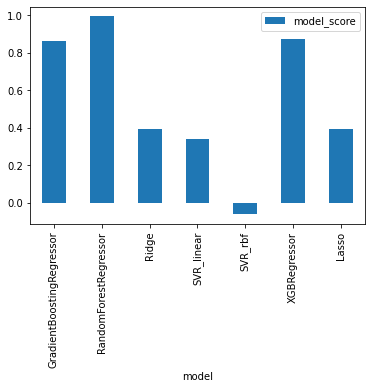

In [130]:
# Visualize model scores in bar chart 
df_reg = pd.DataFrame(reg_result.items(), columns=['model', 'model_score'])
df_reg = df_reg.set_index('model')
print(df_reg)
df_reg.plot(kind='bar');

In [144]:
# ------------------------------------------------------------
# Hyperparameter tuning with RandomizedSearchCV
# ------------------------------------------------------------
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

print("=== Hyperparameter tuning with RandomizedSearchCV ===")

# different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(200, 2000, 10),
           "max_depth": [None, 3 , 5, 10, 20, 30],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]
           }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train, y_train)
print("Hyperparameter best parameters")
print(rs_model.best_params_)
print("RandomForestRegressor score: ", rs_model.score(X_train, y_train))
print("")   

=== Hyperparameter tuning with RandomizedSearchCV ===
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished


Hyperparameter best parameters
{'n_estimators': 490, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': 10}
RandomForestRegressor score:  0.9025136484273968



In [145]:
# -----------------------------------
# calculate RMSLE
# -----------------------------------
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    calculates room mean squared log error b/w true and prediction values
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

def show_score(model):
    y_preds = model.predict(X_test)
    scores = {"MAE": mean_absolute_error(y_test, y_preds),
              "RMSLE" : rmsle(y_test, y_preds),
              "R^2": r2_score(y_test, y_preds)
              }
    return scores

In [146]:
# As above score indicated that tuning of hyperparamets is not improve our model
# hence we can consider inital RandomForestRegressor model 
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
print("RandomForestRegressor score :- ", model_rf.score(X_train, y_train))
print("")
show_score(model_rf)

RandomForestRegressor score :-  0.9919974968559255



{'MAE': 27.81040863177227,
 'RMSLE': 0.3521264440701662,
 'R^2': 0.9414929143760732}

In [160]:
# import the test dataset
df_test = pd.read_csv("drive/My Drive/bike-sharing-demand/test.csv",
                 low_memory=False,
                 parse_dates=["datetime"]) # convert into yyyy-mm-dd
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [161]:
# backup of df_test
df_test_bck = df_test.copy()
df_test_bck.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [148]:
# datetime is non-numeric so, we need to turn that into numeric
# We can convert that into day, month, year , etc...
# import the data again with parse dates
df_test["year"] = df_test.datetime.dt.year
df_test["month"] = df_test.datetime.dt.month
df_test["day"] = df_test.datetime.dt.day
df_test["hour"] = df_test.datetime.dt.hour
df_test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,2012,12,31,23


In [149]:
# Now we have enrichied our test dataframe with year, month, day and hour features,
# we can remove datetime
df_test.drop("datetime", axis=1, inplace=True)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [150]:
df_test.shape

(6493, 12)

In [151]:
# check for missing values
df_test.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
dtype: int64

In [152]:
# Check for non-numeric data
df_test.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
year            int64
month           int64
day             int64
hour            int64
dtype: object

In [153]:
# Find the column differences b/w training and test data sets
print(set(X_train.columns) - set(df_test.columns))
print(set(df_test.columns) - set(X_train.columns))

set()
set()


In [154]:
# Now we have same columns at df_test and X_train. Lets do prediction
print("========= Predicted count ============ ")
test_preds = model_rf.predict(df_test)
test_preds

========= Predicted count ============ 


array([ 13.05,   6.46,   8.2 , ..., 141.93, 122.59,  77.75])

In [155]:
# Now we will add predicted data to test set and save it in DF
df_test["pridicted_count"] = test_preds
df_test


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,pridicted_count
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,13.05
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,6.46
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,8.20
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3.89
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,298.75
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,206.30
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,141.93
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,122.59


In [164]:
df_bike_sharing_preds = pd.DataFrame()
df_bike_sharing_preds["datetime"] = df_test_bck["datetime"]
df_bike_sharing_preds["count_preds"] = test_preds
df_bike_sharing_preds.head(10)

,datetime,count_preds
0,2011-01-20 00:00:00,13.05
1,2011-01-20 01:00:00,6.46
2,2011-01-20 02:00:00,8.20
3,2011-01-20 03:00:00,3.89
4,2011-01-20 04:00:00,3.27
5,2011-01-20 05:00:00,7.48
6,2011-01-20 06:00:00,33.34
7,2011-01-20 07:00:00,88.88
8,2011-01-20 08:00:00,193.50
9,2011-01-20 09:00:00,115.90
